# Øving 3 - TMA4320
* **Veiledning:** Torsdag 23. januar, 2020, 0815-1000 i H3
* **Innleveringsfrist:** Torsdag 30. januar, 2020, kl 1400
* **Innleveringsmetode** Følgende to krav er nødvendig for godkjenning
    1. Opplasting av Jupyter Notebook (individuelt) i Blackboard
    2. Svare på Blackboardskjema for de tre kontrollspørsmålene i øvingen

Denne øvingen dreier seg om polynominterpolasjon. Bruk penn og papir til å finne svarene. Ta quizen i Bb.

## Oppgave 1
La følgende interpolasjonsdata være gitt

$$
 \begin{array}{|r||r|r|r|r|}
 \hline
 x_i & 0 & \frac12 & 1 & 2 \\ \hline
 y_i & 1 & 1 & 2 & 1 \\ \hline
 \end{array}
$$

**Oppgave 1a.**
Bestem Lagrangefunksjonene $L_i(x),\ i=0,\ldots,3$ og bestem interpolasjonspolynomet $P_3(x)$ av grad 3.



**Løsning 1a.**
$$
L_0(x) = -x^3+\frac{7}{2} x^2-\frac72 x + 1,\quad
L_1(x) =\frac83 x^3-8 x^2+\frac{16}{3}\,x ,\quad
L_2(x) =-2 x^3 + 5 x^2 - 2 x,\quad
L_3(x) = \frac13 x^3-\frac12 x^2+ \frac16 x
$$

Interpolasjonspolynomet blir

$$
    P_3(x) = -2x^3 + 5 x^2 -2 x + 1
$$

**Kontrollspørsmål 0:**
Hva er koeffisienten foran $x^2$ i $L_0$? **Svar:** $\frac72$

**Kontrollspørsmål 1:**
Hva er koeffisienten foran $x$ i $L_1$? **Svar: $\frac{16}{3}$**

**Kontrollspørsmål 2:**
Hva er koeffisienten foran $x$ i $L_2$? **Svar:** -2

**Kontrollspørsmål 3:**
Hva er koeffisienten foran $x^2$ i $L_3$? **Svar:** $-\frac12$

**Kontrollspørsmål 4:**
Hva er koeffisienten foran $x^3$ i $P_3$? **Svar** $-\frac12$


**Oppgave 1b.** Sett opp tabellen over dividerte differenser for dataene ovenfor, og skriv ned interpolasjonspolynomet på Newton's form.

**Løsning 1b.**

Dividerte differenser

$$
\begin{array}{r|rrrr}
0      &  1 &    &     & \\
       &    &  0 &     &  \\
\frac12&  1 &    &  2  & \\
       &    &  2 &     & -2 \\
1      &  2 &    & -2  \\
       &    & -1 &   \\
2      &  1 &    &
\end{array},\qquad
\begin{array}{rcl}
P_3(x) &=& 1 + 0 (x-0) + 2 (x-0)(x-\frac12) - 2 (x-0)(x-\frac12)(x-1)\\
       &=& -2x^3 + 5 x^2 -2 x + 1
\end{array}
$$


**Kontrollspørsmål 5:**
Hva er $f\left[x_0, x_1, x_2\right]$? **Svar:** 2


## Oppgave 2
 
Kvadratrotfunksjonen, $f(x)=\sqrt{x}$ skal approksimeres med lineær interpolasjon med hensyn på abscissene
$x_0=\frac14$ og $x_1=1$.

*Kommentar.* Klassiske biblioteksrutiner for beregning av $\sqrt{x}$ gjør følgende: Først skalerer de argumentet $x$ ved å skrive det på formen $x=2^{2m}y$ der $m$ er et heltall og $\leq\frac14\leq y<1$ slik at $\sqrt{x}=2^m\sqrt{y}$. Man kan så bruke Newtoniterasjon på $f(z)=z^2-y=0$ som tar formen $z_{k+1}=\frac12(z_k+\frac{y}{z_k})$. Men $z_0$ må bestemmes. Da kan man for eksempel benytte interpolasjon slik vi gjør her, og feilskranke er viktig.
 

**Oppgave 2a.** Finn det lineære interpolasjonspolynomet $P(x)$ som interpolerer $f(x)$ i abscissene $x_0$ og $x_1$.

**Kontrollspørsmål 6.** Angi $P(\frac12)$. **Svar:** $\frac23$

**Løsning 2a.** $P(x)=\frac23 x + \frac13$

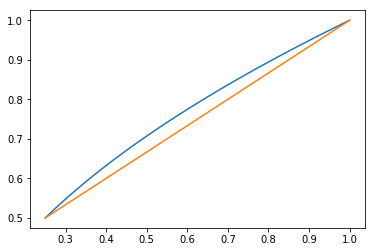

In [3]:
# Løsning 2a fortsatt
import numpy as np
import matplotlib.pyplot as plt
X=np.linspace(0.25,1.0,40)
Y=np.sqrt(X)
Y1=2./3.*X+1./3.
plt.plot(X,Y,X,Y1)
plt.show()

**Oppgave 2b.** Bruk den generelle feilformelen for interpolasjon til å lage en øvre skranke for feilen.
Gjør dette ved først å bestemme $M=\max_{t\in[\frac14,1]} |f''(t)|$, og deretter finne maximum av absoluttverdien til
datapolynomet $(x-x_0)(x-x_1)$.

**Kontrollspørsmål 7.** Angi feilskranken som en brøk $\frac{p}{q}$ der $p$ og $q$ er relativt primiske heltall (dvs brøken er maksimalt forkortet). **Svar** $\frac{9}{64}$

**Løsning 2b.** Med $f(x)=\sqrt(x)=x^{1/2}$ fås
$$
f''(t) = -\frac14 t^{-3/2}
$$
Vi ser at $|f''(t)|$ er avtagende for alle $t>0$ så maksverdien inntreffer i $t=\frac14$. Vi finner at
$M=\frac14\left(\frac14\right)^{-3/2}=2$. Vi finner også 
$$
\max_{x\in[\frac14,1]} |(x-\frac14)(x-1)|=\frac{9}{64}\approx 0.1406
$$
Til slutt får vi da skranken for interpolasjonsfeilen
$$
|f(x)-P(x)| \leq \frac{M}{(1+1)!} \max_{x\in[\frac14,1]}|(x-\frac14)(x-1)| = \frac{2}{2}\cdot\frac{9}{64}\approx 0.1406
$$

**Oppgave 2c.** Finn deretter eksakt maksimalfeil $\max_{x\in[\frac14,1]} |f(x)-P(x)|$ og sammenlign denne med skranken fra **2b.**

**Kontrollspørsmål 8.** Angi denne maksimalfeilen som en brøk $\frac{p}{q}$ der $p$ og $q$ er relativt primiske heltall. **Svar:** $\frac{1}{24}$

**Løsning 2c.** Dette er en god gammeldags funksjonsdrøftingsoppgave, vi bruker standard metodikk fra Matematikk 1 til å beregne ekstremalverdiene til

$$
%\max_{x\in[\frac14,1]}
e(x)=\sqrt{x}-(\frac23 x + \frac13)
$$

Endepunktene kan vi se bort fra så vi sjekker stasjonære punkter

$$
e'(x) = \frac12 x^{-1/2} - \frac23 = 0\quad\Rightarrow\quad x=\frac{9}{16},\quad |e(\frac{9}{16})|=\frac{1}{24}\approx
0.0417
$$

Så konklusjonen er at den virkelige feilen er litt mindre enn en tredjedel av skranken. Dette er kanskje ikke så galt.

